#Guia Mini projeto- Dados exploratorios com Python e SQL
Vamos Apresentar um guia basico de analise exploratoria de dados -usando linguagem Python,linguagem sql e Bdsqlite.
Usaremos dados reais e disponiveis publicamente , dados sobre filmedo site IMDB
guias avançados de Analise Exploratoria de dados.



-Questionamentos  a serem Respondindos

1- Quais sao as categorias de filmes  mais comuns do IMDB?
2- Qual o numero de titulos por genero?
3- Qual a mediana de avaliação dos filmes por genero?
4- Qual a mediana de avaliação dos filmes em relaçãoaoano de estreia?
5- Qual numero de filmes avaliados por genero em relação ao ano e estreia?
6- Qual o filme com maior tempode duração ? caulcule os percentis.
7- Qual relação entre duração e genero?
8- Qual o numero de filmes produzidos?
9- Quais sao os tops 10 melhores filmes?
10-Quais sao os 10 piores filmes?  


In [1]:
# Verificando a versão python
from platform import python_version
print("Versao da linguagem python usada neste Jupyter Notebook é:",python_version() )

Versao da linguagem python usada neste Jupyter Notebook é: 3.9.12


https://pypi.org/
    
https://pypi.org/projects/imdb-sqlite/

In [2]:
# Instalar os pacotes necessarios para projeto
# Ao ser executado sera realizado download do dataset
!pip install -q imdb-sqlite  

In [3]:
# Instalar outro pacote
#https://pypi.org/project/pycountry/
!pip install -q pycountry

In [4]:
import sqlite3

In [5]:
# Agora vamos fazer os imports

import re  
# Pacote de expressoes regulares qdo precisamos , processar textos
import time
# medir tempo de execusao ou ser usados datas 
import pycountry 
# paises e cidades iso
import numpy as np 
# pacote usado para manipulacao de dados em python
import pandas as pd 
# pacote usado para manipulacao de dados em python
import matplotlib.pyplot as plt 
# Para visualização de dados python
from matplotlib import cm
import seaborn as sns 
# Para visualização de dados Python
from sklearn.feature_extraction .text import CountVectorizer 
# Pacote para machine learning python
import warnings  
# pacote que da algum alerta algum problema , mas puli demais o jupyter
warnings.filterwarnings('ignore')
# Filtrando o warnings
sns.set_theme(style="whitegrid")
# Filtrando o tipo de grafico que desejo no projeto, sera defundo branco com linhas verticais

# Ao executar carregara todos os pacotes , se der erro pode ser porque nao esteja usando anaconda.
#todos esses pacotes tem no anaconda


In [6]:
# Carregando os dados 
#Primeiro temos que baixar os dados 

!imdb-sqlite

2022-08-09 10:40:26,571 DB already exists: (imdb.db). Refusing to modify. Exiting


In [7]:
# Conetando ao BD
conn = sqlite3.connect("imdb.db")

In [8]:
# Extrair lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS'TABLE_NAME'FROM sqlite_master WHERE type='table'",conn)

In [9]:
# tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [10]:
# Visualiza os resultados
tabelas.head()


,TABLE_NAME
0,people
1,titles
2,akas
3,crew
4,episodes


In [11]:
# Convertendo o dataframe para lista
tabelas = tabelas['TABLE_NAME'].values.tolist()

In [12]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas :
    consulta = 'PRAGMA TABLE_INFO({})'.format(tabela)
    resultado1 = pd.read_sql_query(consulta,conn) 
    print('Esquema da tabela:', tabela)
    display(resultado1)
    print("_"*100)
    print('\n')
    

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


____________________________________________________________________________________________________


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


____________________________________________________________________________________________________




Agora vamos começar começar as analises exploratorias de dados

In [13]:
# 1- Quais sao as categorias de filmes  mais comuns do IMDB?

In [14]:
# Criar a consulta no sql- SELECIONE TYPE = CATEGORIA COUNT= NUMERO DE REGISTROS, SE NAO COLAR AS COUNT RETORNAR EM (***)
# FROM TITLES = TABELA A BUSCAR E GROUP BY = AGRUPAR POR TIPO
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY TYPE'''

In [15]:
# Extrair o resultado
resultado1= pd.read_sql_query(consulta1,conn)

In [16]:
# Visualizar o resultado1

display(resultado1)

,type,COUNT
0,movie,617619
1,short,882541
2,tvEpisode,6871485
3,tvMiniSeries,44596
4,tvMovie,137074
5,tvPilot,2
6,tvSeries,229177
7,tvShort,10628
8,tvSpecial,37840
9,video,263832


In [17]:
# Vamos calcular percentual para cada tipo

resultado1['percentual']= (resultado1['COUNT'] / resultado1['COUNT'].sum())*100

In [18]:
# Visualizar resultado
display(resultado1)

,type,COUNT,percentual
0,movie,617619,6.767275
1,short,882541,9.670035
2,tvEpisode,6871485,75.291123
3,tvMiniSeries,44596,0.488640
4,tvMovie,137074,1.501925
5,tvPilot,2,0.000022
6,tvSeries,229177,2.511101
7,tvShort,10628,0.116451
8,tvSpecial,37840,0.414614
9,video,263832,2.890817


In [19]:
# Vamos criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionário vazio
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajusta o nome
others['type'] = 'others'



In [20]:
# Visualiza comando acima
others

{'COUNT': 754909, 'percentual': 8.27156668332867, 'type': 'others'}

In [21]:
# Filtra o dataframe de resultado

resultado1 = resultado1[resultado1['percentual']>5]

In [22]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others,ignore_index=True)

In [23]:
# Ordenando resultado
resultado1=resultado1.sort_values(by ='COUNT',ascending = False)

In [24]:
# Visualiza comando acima

resultado1.head()


,type,COUNT,percentual
2,tvEpisode,6871485,75.291123
1,short,882541,9.670035
3,others,754909,8.271567
0,movie,617619,6.767275


In [25]:
# Agora vamso ajustar os labels

labels=[str(resultado1['type'][i])+''+'['+str(round(resultado1['percentual'][i]))+'%'+']'for i in resultado1.index] # List Comprehension

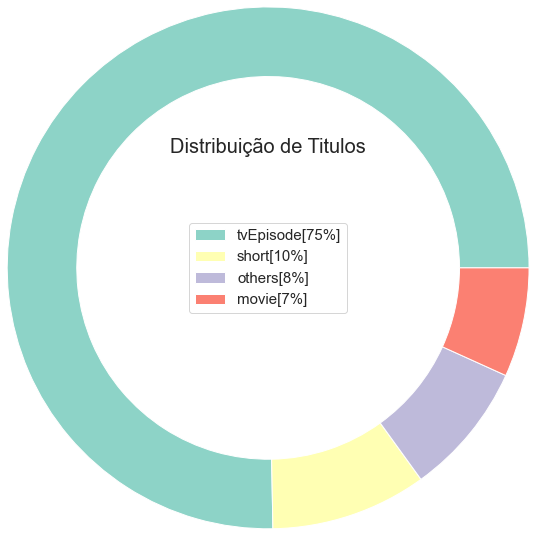

In [26]:
# plot -aprsentar os graficos
#Mapa de cores
#http://matplotlib.org/stable/tutoriais /colors/colormaps.html
cs = cm.Set3(np.arange(100))
# cria a figura
f= plt.figure()
# pie plot
plt.pie(resultado1['COUNT'],labeldistance=1, radius = 3 , colors = cs, wedgeprops=dict(width=0.8))
plt.legend(labels,loc= 'center', prop ={'size':15})
plt.title('Distribuição de Titulos', loc = 'center',fontdict = {'fontsize':20, 'fontweight':20})
plt.show()

2- Qual o numero de titulos por genero?Vamos verificar o numero de titulos por genero.

In [27]:
# Vamos cria a consulta SQL
consulta2='''SELECT genres, COUNT(*)FROM titles WHERE type='movie'GROUP BY genres'''

In [28]:
# Resultado
resultado2=pd.read_sql_query(consulta2,conn)

In [29]:
# Visualizar  resultado 2
display(resultado2)

,genres,COUNT(*)
0,Action,14138
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",6
4,"Action,Adult,Crime",9
...,...,...
1460,"Thriller,Western",43
1461,War,1311
1462,"War,Western",14
1463,Western,5085


In [30]:
# Converte as strings para minusculo
resultado2['genres']=resultado2['genres'].str.lower().values

In [31]:
# Remove valores NA (ausentes)
temp=resultado2['genres'].dropna()

In [32]:
# Vamos criar um vetor usando expressão regular parafiltrar as strings
# https://docs.python.org.3.9/library/re.html
padrao='(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vetor= CountVectorizer (token_pattern = padrao , analyzer = 'word').fit(temp)    

In [33]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [34]:
# Apliacando a vetorização ao dataset sem  valores NA
bag_generos = vetor.transform(temp)

In [35]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [36]:
# Retorna generos unicos
generos_unicos=vetor.get_feature_names()

In [37]:
# Criamos o dataframe de generos
generos = pd.DataFrame(bag_generos.todense(),columns = generos_unicos,index = temp.index)

In [38]:
# Visualiza resultado generos
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1465 non-null   int64
 1   adult        1465 non-null   int64
 2   adventure    1465 non-null   int64
 3   animation    1465 non-null   int64
 4   biography    1465 non-null   int64
 5   comedy       1465 non-null   int64
 6   crime        1465 non-null   int64
 7   documentary  1465 non-null   int64
 8   drama        1465 non-null   int64
 9   family       1465 non-null   int64
 10  fantasy      1465 non-null   int64
 11  film-noir    1465 non-null   int64
 12  game-show    1465 non-null   int64
 13  history      1465 non-null   int64
 14  horror       1465 non-null   int64
 15  music        1465 non-null   int64
 16  musical      1465 non-null   int64
 17  mystery      1465 non-null   int64
 18  n            1465 non-null   int64
 19  news         1465 non-null   int64
 20  reality-

In [39]:
# Apagar coluna N (drop)
generos= generos.drop(columns='n', axis = 0 )

In [40]:
# Calculando percentual
generos_percentual = 100 * (generos.sum()).sort_values(ascending =False)/ generos.shape[0]

In [41]:
# Visualiza generos percentual

generos_percentual.head(11)

drama          17.952218
comedy         16.996587
documentary    15.836177
adventure      14.880546
action         14.539249
romance        13.310580
crime          13.037543
mystery        12.423208
thriller       12.286689
horror         12.218430
fantasy        12.081911
dtype: float64

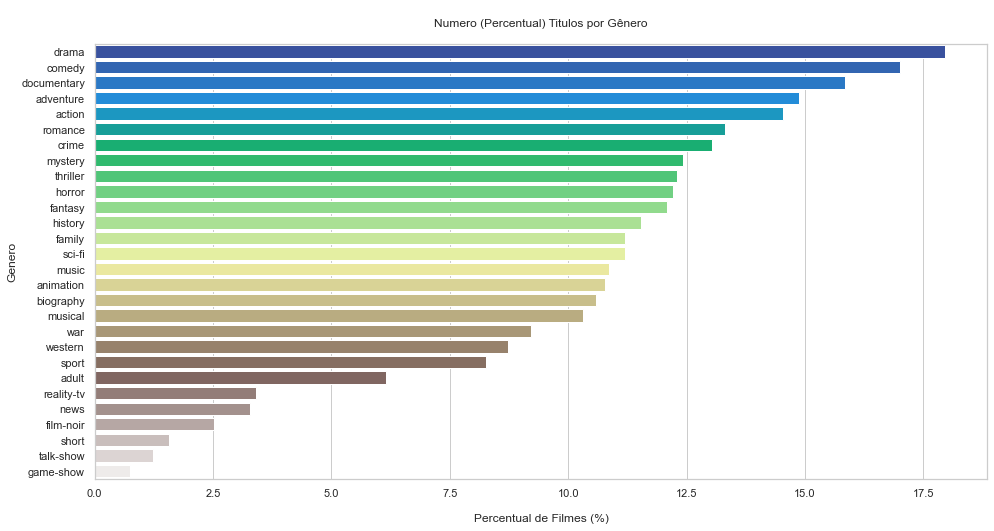

In [42]:
# plot 
plt.figure(figsize=(16,8))
sns.barplot(x=generos_percentual.values, y = generos_percentual.index,orient = 'h', palette = 'terrain' )
plt.ylabel('Genero')
plt.xlabel('\nPercentual de Filmes (%)')
plt.title('\nNumero (Percentual) Titulos por Gênero\n')
plt.show()

3- Qual a mediana de avaliação dos filmes por genero? verificando a mediana dos filmes por genero

In [43]:
# Vamos consulta o banco sql 
consulta3 = '''SELECT rating,genres FROM ratings JOIN titles ON ratings.title_id = titles.title_id
                WHERE premiered <= 2022 AND type = 'movie'
                '''

In [44]:
resultado3 = pd.read_sql_query(consulta3,conn)

In [45]:
display(resultado3)

,rating,genres
0,5.3,Romance
1,4.5,\N
2,6.0,"Action,Adventure,Biography"
3,4.7,Drama
4,4.5,Drama
...,...,...
280565,5.8,Thriller
280566,6.4,"Drama,History"
280567,3.8,"Adventure,History,War"
280568,8.3,Drama


In [46]:
# Vamos criar uma função para retornar os generos

def retorna_generos(df):
    df['genres']= df['genres'].str.lower().values
    temp =df['genres'].dropna()
    vetor= CountVectorizer (token_pattern = '(?u)\\b[\\w-]+\\b' , analyzer = 'word').fit(temp) 
    generos_unicos=vetor.get_feature_names()
    generos_unicos=[genre for genre in generos_unicos if len (genre)> 1]
    return generos_unicos

In [47]:
# Aplica a funçao df
generos_unicos = retorna_generos(resultado3)


In [48]:
# visualiza generos unicos

display (generos_unicos )

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [49]:
# Criar uma lista vazia

generos_counts = []
generos_ratings= []

In [50]:
# Loop
for item in generos_unicos:
    # Retorna contagem de filmes por genero
    consulta = 'SELECT COUNT(rating)FROM ratings JOIN titles ON ratings.title_id =titles.title_id WHERE genres LIKE'+'\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta,conn)
    generos_counts.append(resultado.values[0][0])
    
    # retorna a avaliação de filmes por genero    
    consulta='SELECT rating FROM ratings JOIN titles ON ratings.title_id = titles.title_id WHERE genres LIKE'+'\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado =pd.read_sql_query(consulta,conn)
    generos_ratings.append(np.median(resultado['rating']))
    
    

In [51]:
# Prepara o dataframe final
df_generos_ratings=pd.DataFrame()
df_generos_ratings['genres']=generos_unicos
df_generos_ratings['count']=generos_counts
df_generos_ratings['rating'] =generos_ratings


In [52]:
# Visualizar 
df_generos_ratings.head(20)

,genres,count,rating
0,action,29125,5.80
1,adult,4396,5.80
2,adventure,17609,6.00
3,animation,4828,6.60
4,biography,8568,7.00
5,comedy,69247,6.00
6,crime,23992,6.10
7,documentary,42144,7.30
8,drama,124232,6.30
9,family,10816,6.30


In [53]:
df_generos_ratings= df_generos_ratings.drop(index=18 )

In [54]:
df_generos_ratings.head(20)

,genres,count,rating
0,action,29125,5.80
1,adult,4396,5.80
2,adventure,17609,6.00
3,animation,4828,6.60
4,biography,8568,7.00
5,comedy,69247,6.00
6,crime,23992,6.10
7,documentary,42144,7.30
8,drama,124232,6.30
9,family,10816,6.30


In [55]:
df_generos_ratings = df_generos_ratings.sort_values(by='rating', ascending =False)

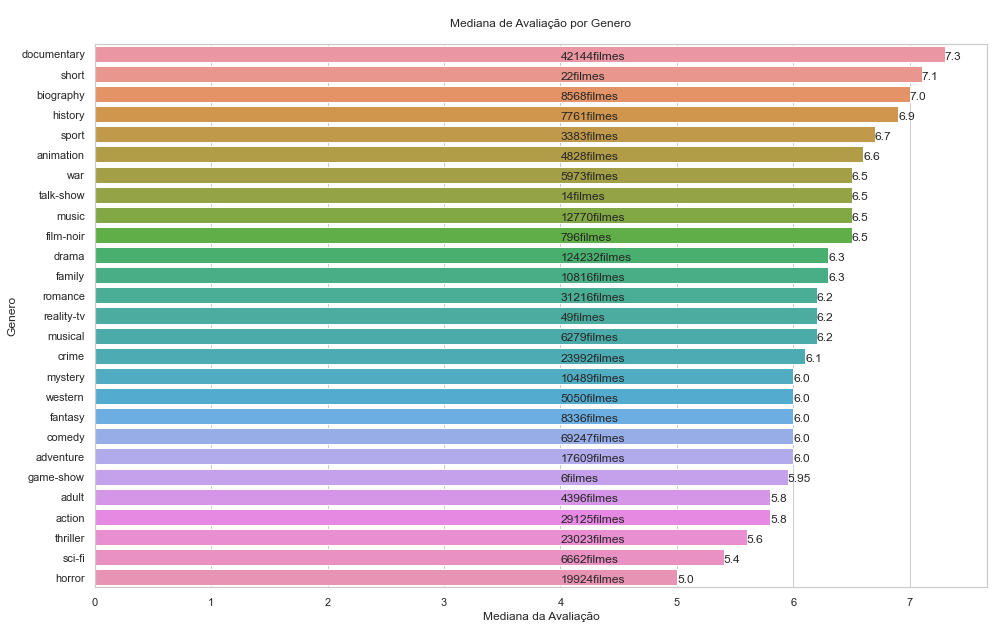

In [56]:
# plot
# Figura 
plt.figure(figsize=(16,10))

# Barplot
sns.barplot(y = df_generos_ratings.genres, x = df_generos_ratings.rating,orient = 'h')

# Texto do grafico
for i in range(len(df_generos_ratings.index)):
       
    plt.text(4.0,
             i + 0.25,
             str(df_generos_ratings['count'][df_generos_ratings.index[i]])+ 'filmes')
    
    plt.text(df_generos_ratings.rating[df_generos_ratings.index[i]],
             i + 0.25,
             round(df_generos_ratings['rating'][df_generos_ratings.index[i]],2))
            
plt.ylabel('Genero')
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação por Genero\n')
plt.show()


4- Qual a mediana de avaliação dos filmes em relação ao ano de estreia?

In [57]:
consulta4= '''
           SELECT rating AS Rating,premiered FROM
           ratings JOIN titles ON ratings.title_id=titles.title_id
           WHERE premiered <= 2022 AND type = 'movie'
           ORDER BY premiered'''

In [58]:
# Resultado da query

resultado4 = pd.read_sql_query(consulta4,conn)

In [59]:
display(resultado4)

,Rating,premiered
0,5.3,1894
1,6.7,1896
2,4.5,1897
3,4.0,1899
4,3.7,1899
...,...,...
280565,7.0,2022
280566,8.2,2022
280567,6.8,2022
280568,5.3,2022


In [60]:
# Calculamos a mediana ao longo do tempo(anos)
ratings = []
for year in set (resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered']==year]['Rating']))

In [61]:
type(ratings)

list

In [62]:
ratings[1:10]

[6.7, 4.5, 3.85, 5.85, 6.2, 3.4, 4.6, 5.3, 4.55]

In [63]:
# Lista anos 
anos= list(set(resultado4['premiered']))

In [64]:
anos[1:10]

[1896, 1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905]

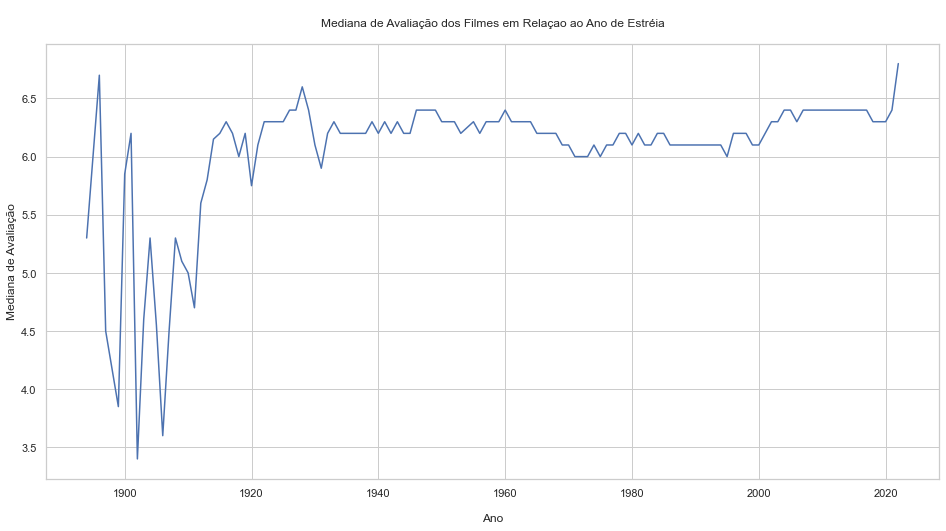

In [65]:
plt.figure(figsize = (16,8))
plt.plot(anos,ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes em Relaçao ao Ano de Estréia\n')
plt.show()

5- Qual numero de filmes avaliados por genero em relação ao ano e estreia

In [68]:
consulta5 = '''
            SELECT genres FROM titles'''

In [69]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [70]:
display (resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9126549,"Action,Drama,Family"
9126550,"Action,Drama,Family"
9126551,"Action,Drama,Family"
9126552,Short


In [71]:
# Retorna generos unicos
generos_unicos=retorna_generos(resultado5)


In [72]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [73]:
# Agora fazemos a contagem
genero_count=[]

for item in generos_unicos:
    consulta ='SELECT COUNT(*)COUNT FROM titles WHERE genreS LIKE'+'\''+'%'+item+'%'+'\'AND type=\'movie\'AND premiered <=2022'
    resultado = pd.read_sql_query(consulta,conn)
    genero_count.append(resultado['COUNT'].values[0])

In [74]:
# Prepara DataFrame
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [75]:
# Calcula os tops 5

df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending= False)
top_generos= df_genero_count.head()['genre'].values


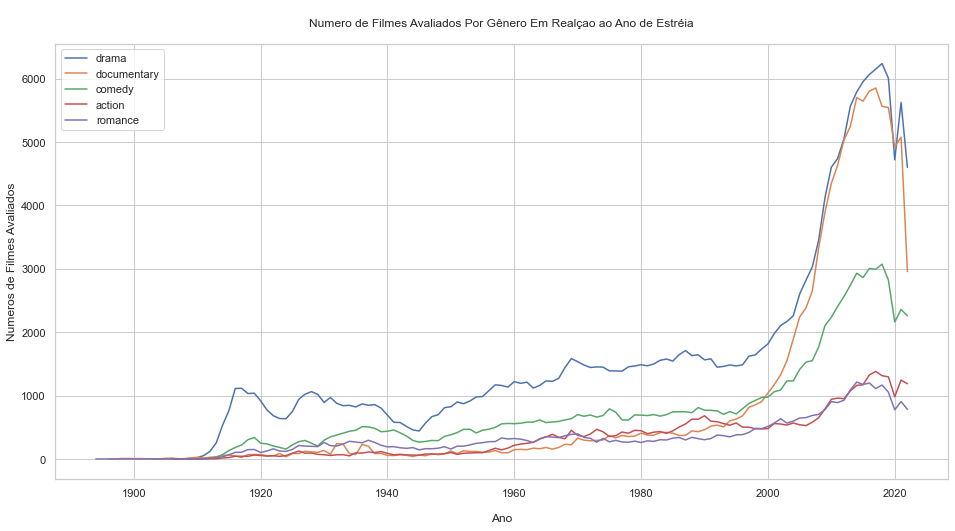

In [76]:
# Plot
# figura
plt.figure(figsize = (16,8))

# Loop plot
for item in top_generos:
    consulta ='SELECT COUNT(*)Number_of_movies, premiered Year FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year' 
    resultado = pd.read_sql_query(consulta,conn)
    plt.plot(resultado['Year'],resultado['Number_of_movies'])
    
plt.xlabel('\nAno')
plt.ylabel('Numeros de Filmes Avaliados')
plt.title('\nNumero de Filmes Avaliados Por Gênero Em Realçao ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()    
    
    
    

6- Qual o filme com maior tempo de duração ? calcule os percentis.

In [82]:
# Consulta bd SQL
consulta6 = '''            
                SELECT runtime_minutes Runtime
                FROM titles
                WHERE type ='movie' AND Runtime !='NaN'
                '''



In [83]:
#, Colocando consulta6 dentro de resultado6
resultado6 = pd.read_sql_query(consulta6,conn)

In [84]:
# Mostrando resultado da consulta6
display(resultado6)

,Runtime
0,45
1,100
2,70
3,90
4,120
...,...
389706,123
389707,57
389708,100
389709,116


In [85]:
# Loop para calculo dos percentis

for i in range(101):
    val = i
    perc= round(np.percentile(resultado6['Runtime'].values,val),2)
    print('{} percentil da duração (runtime)é:{}'. format(val,perc))
    

0 percentil da duração (runtime)é:1.0
1 percentil da duração (runtime)é:45.0
2 percentil da duração (runtime)é:47.0
3 percentil da duração (runtime)é:50.0
4 percentil da duração (runtime)é:50.0
5 percentil da duração (runtime)é:51.0
6 percentil da duração (runtime)é:52.0
7 percentil da duração (runtime)é:53.0
8 percentil da duração (runtime)é:55.0
9 percentil da duração (runtime)é:56.0
10 percentil da duração (runtime)é:57.0
11 percentil da duração (runtime)é:58.0
12 percentil da duração (runtime)é:60.0
13 percentil da duração (runtime)é:60.0
14 percentil da duração (runtime)é:60.0
15 percentil da duração (runtime)é:61.0
16 percentil da duração (runtime)é:62.0
17 percentil da duração (runtime)é:64.0
18 percentil da duração (runtime)é:65.0
19 percentil da duração (runtime)é:67.0
20 percentil da duração (runtime)é:69.0
21 percentil da duração (runtime)é:70.0
22 percentil da duração (runtime)é:70.0
23 percentil da duração (runtime)é:71.0
24 percentil da duração (runtime)é:72.0
25 percenti

In [95]:
# Refazendo a consulta e retornando o filme com maior duração , pois temos um outlier
consulta6 = '''
            SELECT runtime_minutes Runtime , primary_title
            FROM titles
            WHERE type='movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            '''

In [97]:
resultado6= pd.read_sql_query(consulta6,conn)

In [98]:
resultado6

,Runtime,primary_title
0,51420,Logistics


 Outlier realmente acontece devido ao filme existente de nome logistics que tem uma duração de 51420 minutos,se 
levar para um trabalho de machine learning , devemo sprimeiro averiguar se é o caso adiciona-lo

7- Qual relação entre duração e genero?

In [133]:
consulta7= '''
            SELECT AVG(runtime_minutes)Runtime , genres 
            FROM titles
            WHERE type='movie' AND runtime_minutes != 'NaN'
            GROUP BY genres 

          '''

In [134]:
resultado7= pd.read_sql_query(consulta7, conn)

In [135]:
generos_unicos =retorna_generos(resultado7)

In [143]:
# Calcula duração por genero
genero_runtime=[]

for item in generos_unicos :
    consulta = 'SELECT runtime_minutes Runtime  FROM titles WHERE genres LIKE'+'\''+'%'+item+'%'+'\' AND type=\'movie\'AND Runtime!=\'Nan\''
    resultado = pd.read_sql_query(consulta,conn)
    genero_runtime.append(np.median(resultado['Runtime']))


In [144]:
# Prepara DataFrame
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] =generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [145]:
# Remove indice 18(news)
df_genero_runtime=df_genero_runtime.drop(index=18)

In [146]:
# Ordena os dados
df_genero_runtime= df_genero_runtime.sort_values(by = 'runtime', ascending=False)

In [147]:
df_genero_runtime

,genre,runtime
20,romance,95.0
0,action,94.0
8,drama,93.0
16,musical,93.0
26,war,92.0
25,thriller,92.0
6,crime,92.0
5,comedy,91.0
17,mystery,91.0
15,music,90.0


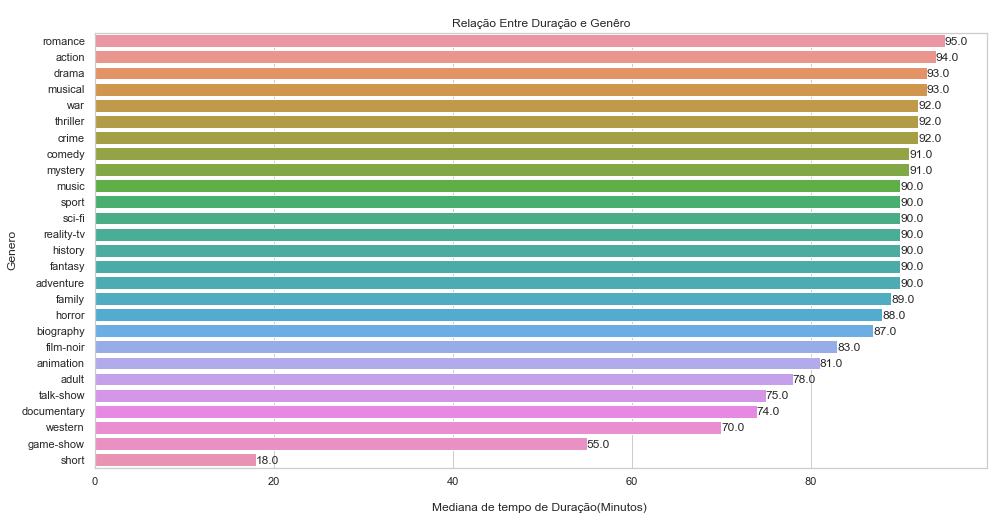

In [148]:
# Plot - Preparando grafico
# Tamanho do grafico
plt.figure(figsize=(16,8))

# Bar plot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime,orient = 'h')

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime['runtime'][df_genero_runtime.index[i]],2))

plt.ylabel('Genero')
plt.xlabel('\nMediana de tempo de Duração(Minutos) ')
plt.title ('\nRelação Entre Duração e Genêro')
plt.show()



8- Qual o numero de filmes produzidos? 

In [193]:
# Vamos consultar novamente o BD sql

consulta8='''
           SELECT region, COUNT(*) Number_of_movies FROM
           akas JOIN titles ON
           akas.title_id=titles.title_id
           WHERE region!='None'
           AND type = \'movie\'
           GROUP BY region

         '''

In [194]:
resultado8 = pd.read_sql_query(consulta8,conn)

In [195]:
display(resultado8)

,region,Number_of_movies
0,AD,21
1,AE,6897
2,AF,114
3,AG,12
4,AL,1295
...,...,...
229,YUCS,153
230,ZA,7554
231,ZM,15
232,ZRCD,2


In [196]:
# Shape
resultado8.shape

(234, 2)

In [197]:
# Numero de linhas 
resultado8.shape[0]

234

In [198]:
# Listas auxiliares
nomes_paises=[]
contagem=[]

In [199]:
#loop para obter o país de acordo com codigo da região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except:
        continue


In [200]:
# Prepara o DataFrame
df_filmes_paises= pd.DataFrame()
df_filmes_paises['country']= nomes_paises
df_filmes_paises['Movie_Count']=contagem

In [201]:
# Ordena Resultado
df_filmes_paises=df_filmes_paises.sort_values(by = 'Movie_Count',ascending=False)

In [202]:
# Visualizar
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,315433
65,United Kingdom,160734
96,Japan,92670
63,France,85812
89,India,84649
32,Canada,80552
47,Germany,72174
58,Spain,66778
26,Brazil,66277
93,Italy,66251


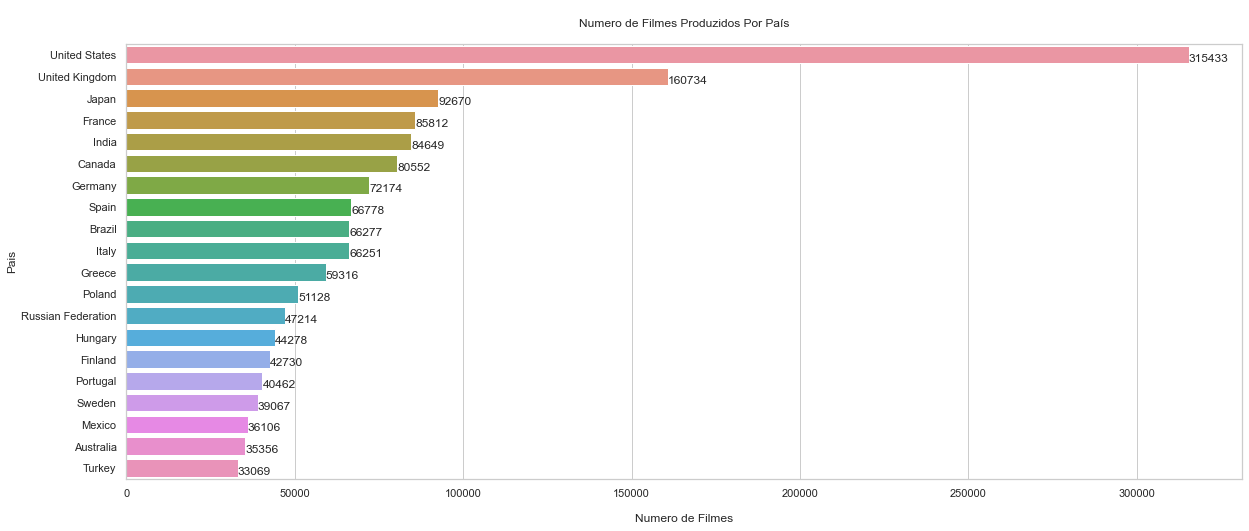

In [203]:
# Plot
# figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count,orient ='h')

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises['Movie_Count'][df_filmes_paises.index[i]],2))
    
plt.ylabel('Pais')
plt.xlabel('\nNumero de Filmes')
plt.title ('\nNumero de Filmes Produzidos Por País\n')
plt.show()
  



9- Quais sao os tops 10 melhores filmes?

In [213]:
consulta9= '''
            SELECT primary_title AS Movie_Name,genres,rating
            FROM
            Titles JOIN ratings
            ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie'AND ratings.votes <= 25000
            ORDER BY rating DESC
            LIMIT 10
          '''

In [214]:
# Resultado

top10_melhores_filmes =pd.read_sql_query(consulta9,conn)

In [215]:
# Mostrando resultado
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,The Chaos Class,"Comedy,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,Rocketry: The Nambi Effect,"Biography,Drama",9.1
5,12 Angry Men,"Crime,Drama",9.0
6,The Godfather Part II,"Crime,Drama",9.0
7,Schindler's List,"Biography,Drama,History",9.0
8,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
9,The Dark Knight,"Action,Crime,Drama",9.0


 10-Quais sao os 10 piores filmes?

In [224]:
consulta10 = '''
            SELECT primary_title AS Movie_Name,genres,rating
            FROM
            Titles JOIN ratings
            ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie'AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
          '''

In [225]:
# Resultado

top10_piores_filmes =pd.read_sql_query(consulta10,conn)

In [226]:
# Mostrando resultado
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Crime,Drama,History",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,From Justin to Kelly,"Comedy,Musical,Romance",1.9
9,The Hottie & the Nottie,"Comedy,Romance",1.9
